In [35]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from ultralytics import YOLO

## 1. Read in Image, Grayscale

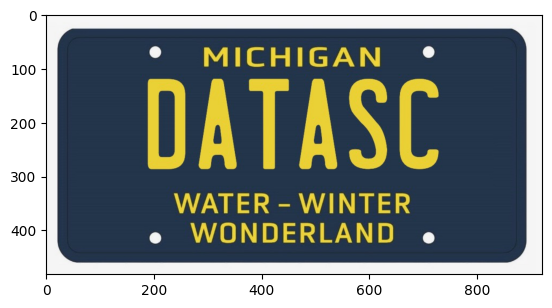

In [36]:
img = cv2.imread('../data/generated3.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## 2. Import the pre-trained license detector model and find the license location

In [37]:
license_plate_detector = YOLO('license_plate_detector.pt')

In [38]:
license_plates = license_plate_detector(source=img, conf=0.60)


0: 352x640 1 license_plate, 59.8ms
Speed: 2.8ms preprocess, 59.8ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


In [39]:
for license_plate in license_plates[0].boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = license_plate

# 3. Crop the image with the coordinates found above

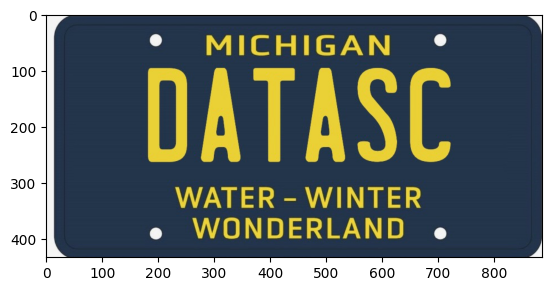

In [40]:
 # crop license plate
license_plate_crop = img[int(y1):int(y2), int(x1): int(x2), :]
plt.imshow(cv2.cvtColor(license_plate_crop,cv2.COLOR_BGR2RGB))

# 4. Treat the cropped image

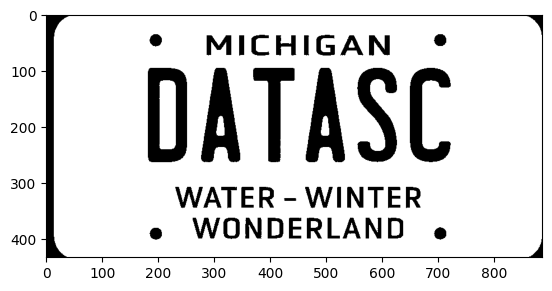

In [41]:
blurred = cv2.GaussianBlur(license_plate_crop, (3, 3), 0)  # Apply Gaussian blur
sharpened = cv2.addWeighted(license_plate_crop, 3, blurred, -1.95, 0)# Sharpen the image

gray = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Thresholding

plt.imshow(binary, cmap='gray')

# 5. Predict the text contained in the treated image

In [42]:
reader = easyocr.Reader(['en'])
result = reader.readtext(sharpened, detail=0)
result

['MICHIGAN', 'Datasc', 'WATER', 'F', 'WINTER', 'WONDERLAND']